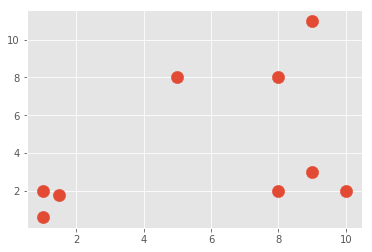

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

Make all datapoints centroids
Take mean of all featuresets within centroid's radius, setting this mean as new centroid.
Repeat step #2 until convergence.

------------------------------------------------
[(1.1666666666666667, 1.4666666666666666), (5.0, 8.0), (8.0, 8.0), (9.0, 2.3333333333333335), (9.0, 11.0)]
{0: array([1.16666667, 1.46666667]), 1: array([5., 8.]), 2: array([8., 8.]), 3: array([9.        , 2.33333333]), 4: array([ 9., 11.])}
False
False
------------------------------------------------
[(1.1666666666666667, 1.4666666666666666), (5.0, 8.0), (8.0, 8.0), (9.0, 2.3333333333333335), (9.0, 11.0)]
{0: array([1.16666667, 1.46666667]), 1: array([5., 8.]), 2: array([8., 8.]), 3: array([9.        , 2.33333333]), 4: array([ 9., 11.])}


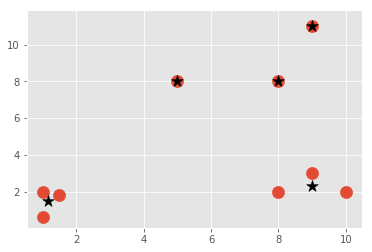

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=3):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:        
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))
            print(uniques)
            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            optimized = True
            for i in centroids:
                #if false then go inside the loop
                if (np.array_equal(centroids[i], prev_centroids[i])) != True:
                    optimized = False                 
                if optimized != True:  #if false then go inside the loop
                    break
            if optimized: 
                break
        
        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()